# **TUGAS PANDAS**

---

Nama:

NIM:


Setelah mengikuti workshop kemarin, tentunya kalian sudah mulai memahami hal-hal apa saja yang akan dilakukan oleh Data Scientist dengan Pandas. Sekarang, saatnya mengukur kemampuan kalian dari apa yang telah kalian dapatkan pada workshop sebelumnya.

**Deadline: Jumat, 1 Maret 2024**

Note: Silakan copy colab ini ke drive masing-masing


## **Dataset**

Pada penugasan kali ini, dataset yang digunakan adalah dataset titanic.


In [2]:
!wget https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import pandas as pd

df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **Soal**


### 1. Urutkan umur penumpang balita (<5 tahun) yang tidak selamat dengan jenis kelamin laki-laki secara menaik!


In [4]:
# Tulis program (jawaban) disini

filter_balita_unsurvived_boy = (df['Age'] < 5) & (
    df['Sex'] == 'male') & (df['Survived'] == 0)
df[filter_balita_unsurvived_boy].sort_values(by='Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
824,825,0,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,NaN,S
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S
171,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.1250,NaN,Q
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S


### 2. Berapa jumlah penumpang yang memiliki nilai fare (biaya tiket) di atas rata-rata dan berada di kelas 1 atau 2 (Pclass=1 atau Pclass=2)?


In [5]:
# Tulis program (jawaban) disini

filter_abvavg_pclass1or2 = (df['Fare'] > df['Fare'].mean()) & ((df['Pclass'] == 1) | (df['Pclass'] == 2))
df[filter_abvavg_pclass1or2].shape[0]

181

### 3. Berapa jumlah penumpang yang memiliki saudara/keluarga dengan nama belakang yang sama (mungkin menunjukkan keluarga yang pergi bersama)? Tampilkan nama belakang yang sama tersebut!


In [6]:
# Tulis program (jawaban) disini

def get_last_name(name):
    return name.split(',')[0]


df['Family Name'] = df['Name'].apply(get_last_name)
grouped = df.groupby('Family Name')
count_family_df = grouped.agg({'PassengerId': 'count'}).sort_values(by="PassengerId", ascending=False)
count_family_df[count_family_df['PassengerId'] > 1]

,PassengerId
Family Name,
Andersson,9
Sage,7
Skoog,6
Carter,6
Goodwin,6
...,...
Zabour,2
White,2
McCoy,2


### 4. Buatlah ringkasan statistik untuk umur (Age) penumpang berdasarkan kelas tiket (Pclass) dan jenis kelamin (Sex)! Ringkasan statistik harus mencakup nilai rata-rata, median, standar deviasi, nilai minimum, dan nilai maksimum (seperti pada gambar di bawah).

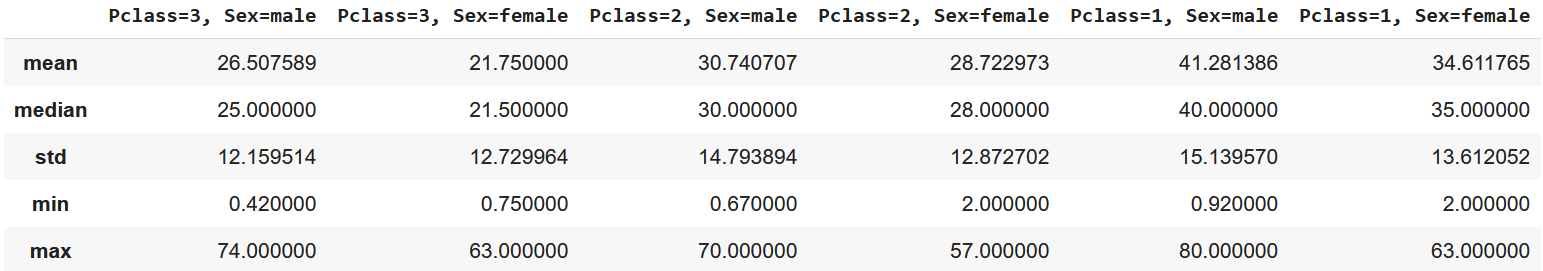


In [7]:
# Tulis program (jawaban) disini

groupped = df.groupby(['Pclass', 'Sex'])
groupped.agg({'Age': ['mean', 'median', 'std', 'min', 'max']})

Age                              
                    mean median        std   min   max
Pclass Sex                                            
1      female  34.611765   35.0  13.612052  2.00  63.0
       male    41.281386   40.0  15.139570  0.92  80.0
2      female  28.722973   28.0  12.872702  2.00  57.0
       male    30.740707   30.0  14.793894  0.67  70.0
3      female  21.750000   21.5  12.729964  0.75  63.0
       male    26.507589   25.0  12.159514  0.42  74.0